# CIRI Human Rights Dataset Analysis

## Introduction

The CIRI Human Rights Dataset Project is composed of US State Department Country Reports on Human Rights Practices and the Amnesty International's Annual Report. This dataset contains quantitative information on government respect for 15 internationally recognized human rights for 202 countries, annually from 1981 to 2011. The scores in this dataset measure how governments allow or restrict their citizens to exercise rights such as Physical Integrity Rights (Torture, Extrajudicial Killing, Political Imprisonment, and Disappearance), Empowerment Rights (Foreign Movement, Domestic Movement, Freedom of Speech, Freedom of Assembly & Association, Workers’ Rights, Electoral Self-Determination, and Freedom of Religion), Worker’s Rights, Women’s Economic Rights, Women’s Political Rights, and Women’s Social Rights. The dataset also includes an index for Independence of the Judiciary which measures the impartiality of the judiciary of each country.

*Source: Cingranelli, David L., David L. Richards, and K. Chad Clay. 2014. "The CIRI Human Rights Dataset." http://www.humanrightsdata.com. Version 2014.04.14.*

## Research Questions

From this dataset, I will look at how the world's practices of Women's Economic Rights had changed from 1981 to 2011. I will look into the correlations between the economy, education, and well-being of a country with its practices of human rights. I also want to explore the landscape of human rights in some countries of my interest, including Iraq, Vietnam, China, Cuba, and Laos. Finally, I plan to use Machine Learning to predict the Happiness Score of a country based on its Empowerment Rights Index.

## Overview & Cleanup of Dataset

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data
import requests

In [2]:
hr = pd.read_csv('CIRI Data 1981_2011 2014.04.14.csv')
hr.head()

,CTRY,YEAR,CIRI,COW,POLITY,UNCTRY,UNREG,UNSUBREG,PHYSINT,DISAP,...,OLD_MOVE,SPEECH,ELECSD,OLD_RELFRE,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
0,Afghanistan,1981,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1982,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Afghanistan,1983,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Afghanistan,1984,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Afghanistan,1985,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
hr.shape

(6262, 28)

## [Read the variable descriptions here](https://drive.google.com/file/d/0BxDpF6GQ-6fbY25CYVRIOTJ2MHM/view?usp=sharing)

*Source: Cingranelli, David L. and David L. Richards. 2014. The Cingranelli-Richards (CIRI) Human Rights Data Project Short Variable Descriptions Version 5.21.14. http://www.humanrightsdata.com/p/data-documentation.html*

## [Find out more about how these rights are evaluated here](https://drive.google.com/file/d/0BxDpF6GQ-6fbWkpxTDZCQ01jYnc/view?usp=sharing)

*Source: Cingranelli, David L. and David L. Richards. 2014. The Cingranelli-Richards (CIRI) Human Rights Data Project Coding Manual Version 5.20.14. <http://www.humanrightsdata.com/p/data-documentation.html>*

In [4]:
#eliminate CIRI, COW, POLITY, UNREG, and UNSBREG columns since they are unnecessary for this analysis
#eliminate OLD_EMPINX, OLD_MOVE, OLD_RELFRE since they're old variables and no longer applicable
hr = hr.drop(columns = ['CIRI', 'COW', 'POLITY', 'UNREG', 'UNSUBREG', 'OLD_EMPINX', 'OLD_MOVE', 'OLD_RELFRE'])
hr.head()

,CTRY,YEAR,UNCTRY,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
0,Afghanistan,1981,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1982,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Afghanistan,1983,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Afghanistan,1984,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Afghanistan,1985,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
#replace -77 (indicates interregnum), -66 (indicates interruption), -999 (indicates missing values) in dataset with NaN
hr = hr.replace([-77, -66, -999], np.nan)

## How the world's practices of Women's Economic Rights had changed from 1981 to 2011

I have created 2 functions to geographically graph the measure of a given human right indicator of each country below. Readers can manipulate those 2 functions to show the measures of the right and year of their interest. In this analysis, I will focus on the world's landscape of Women's Economic Rights (WECON).

> Women's Economic Rights include:
- Equal pay for equal work
- Free choice of profession or employment without the need to obtain a husband or male relative's consent
- The right to gainful employment without the need to obtain a husband or male relative's consent
- Equality in hiring and promotion practices
- Job security (maternity leave, unemployment benefits, no arbitrary firing or layoffs, etc...)
- Non-discrimination by employers
- The right to be free from sexual harassment in the workplace
- The right to work at night
- The right to work in occupations classified as dangerous
- The right to work in the military and the police force

> A score of 0 means that there are no economic rights for women under law and sex discrimination may be incorporated into the law. A score of 1 indicates that women had some economic rights under law, but these rights were not effectively enforced. A score of 2 indicates that women had some economic rights under law, and the government effectively enforced these rights in practice while still allowing a low level of discrimination against women in economic matters. Finally, a score of 3 means that all or nearly all of women's economic rights are guaranteed by law and the government fully and vigorously enforces these laws in practice.

*Source: Cingranelli, David L. and David L. Richards. 2014. The Cingranelli-Richards (CIRI) Human Rights Data Project Short Variable Descriptions Version 5.21.14. http://www.humanrightsdata.com/p/data-documentation.html*

In [6]:
#create a dataset of mean values for all indicators of rights
hr_mean = hr.groupby('CTRY').mean() #automatically skips na
hr_mean['Country'] = hr_mean.index # CTRY is index, not a column to be passed to tooltip function
hr_mean.head()

,YEAR,UNCTRY,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD,Country
CTRY,,,,,,,,,,,,,,,,,,,,
Afghanistan,1996,4.0,1.200000,0.600000,0.200000,0.320000,0.080000,1.920000,0.240000,0.400000,0.240000,0.200000,0.360000,0.440000,0.040000,0.000000,0.960000,0.052632,0.000000,Afghanistan
Albania,1996,8.0,4.884615,1.935484,1.230769,1.032258,0.451613,7.225806,0.967742,1.290323,1.290323,0.806452,0.935484,1.032258,0.903226,1.032258,1.967742,1.045455,0.580645,Albania
Algeria,1996,12.0,3.935484,1.548387,1.000000,0.741935,0.645161,4.451613,0.129032,1.000000,1.225806,0.322581,0.548387,0.774194,0.451613,1.071429,1.580645,0.166667,1.096774,Algeria
Andorra,1996,20.0,8.000000,2.000000,2.000000,2.000000,2.000000,12.400000,2.000000,2.000000,2.000000,1.900000,2.000000,2.000000,0.500000,1.400000,2.500000,1.000000,1.263158,Andorra
Angola,1996,17.0,2.433333,1.033333,0.366667,0.633333,0.400000,3.600000,0.366667,0.633333,0.333333,0.333333,0.300000,1.400000,0.233333,1.000000,2.033333,1.000000,0.200000,Angola


In [7]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [8]:
#function to graph geographically a given indicator in a given year, readers can explore the right of their interest by changing the function's arguments

def geograph_year(indicator, year):
    hr_year = hr[hr['YEAR'] == year]
    countries = alt.topo_feature(data.world_110m.url, 'countries')
    graph = alt.Chart(countries).mark_geoshape(stroke='white'
                                ).encode(color=indicator+':Q', tooltip=['CTRY:N', indicator+':Q']
                                ).transform_lookup(lookup='id', from_=alt.LookupData(hr_year, 'UNCTRY', list(hr_year.columns.values))
                                ).properties(width=750, height=450
                                ).project('equirectangular')

    return graph

In [9]:
#function to graph geographically the mean of a given indicator from 1981-2011, readers can explore the right of their interest by changing the function's arguments

def geograph_mean(indicator):
    countries = alt.topo_feature(data.world_110m.url, 'countries')
    graph = alt.Chart(countries).mark_geoshape(stroke='white'
                                ).encode(color=indicator+':Q', tooltip=['Country:N', indicator+':Q']
                                ).transform_lookup(lookup='id', from_=alt.LookupData(hr_mean, 'UNCTRY', list(hr_mean.columns.values))
                                ).properties(width=750, height=450
                                ).project('equirectangular')

    return graph

In [10]:
geograph_year('WECON', 1981) #world's graph of WECON in 1981

alt.Chart(...)

In [11]:
geograph_year('WECON', 1987) #world's graph of WECON in 1987

alt.Chart(...)

In [12]:
geograph_year('WECON', 1993) #world's graph of WECON in 1993

alt.Chart(...)

In [13]:
geograph_year('WECON', 1999) #world's graph of WECON in 1999

alt.Chart(...)

In [14]:
geograph_year('WECON', 2005) #world's graph of WECON in 2005

alt.Chart(...)

In [15]:
geograph_year('WECON', 2011) #world's graph of WECON in 2011

alt.Chart(...)

In [16]:
geograph_mean('WECON') #world's graph of WECON on average from 1981-2011

alt.Chart(...)

Because making 31 graphs is a lot for this analysis, I decided to just look into the years of 1981, 1987, 1993, 1999, 2005, and 2011 to get a brief overview of how the world's appreciation of WECON had changed. However, one should keep in mind that that these graphs alone do not reflect all the changes in the world's practices of WECON because the scores certainly fluctuated a lot during those 31 years.

These graphs show that the world's landscape of WECON had changed positively. Most countries tend to increase their respect for WECON, especially the countries in Europe, North America, and Australasia. In Latin America, most countries have their scores fluctuate between 1 and 2 from year to year. Notable countries are Costa Rica and Cuba whose scores alternated between 2 and 3. The continent of Africa saw a lot of improvement in WECON score in the middle of the 31-year period. However, in 2011, many countries in Africa have a WECON score of 0. Madagascar stands out for maintaining a score of 2 in many years. Some notable countries in Asia are Mongolia and Bhutan which maintained a pretty consistent score of 2, and South Korea which went from 1 in the previous years to 3 in 2011. However, at the same time, some Asian countries experienced a decrease in their WECON scores from 2 to 1.

In general, the world's practices of WECON had improved a lot since the beginning of the dataset in 1981, as indicated in the world's graph of the average WECON scores from 1981-2011. However, there are a few exceptions. Afghanistan and Iran have an average WECON score of 0 over the period of 31 years, which means that these 2 countries never respected WECON from 1981-2011. The same situation also happens in Saudi Arabia as it has an average WECON score of 0.06. The countries that historically respect WECON the most are Sweden and Finland with average scores of 2.55 and 2.52 respectively.

## Correlations between the economy, education, and well-being of a country with its average practices of human rights

I merged some columns of 2 different datasets that we have worked on before, `world_countries.csv` and `happiness_2012.csv`, into my `hr_mean` dataset so I could look into the correlations between the economy, education, and well-being of a country with its practices of human rights on average from 1981-2011.

In [17]:
#import world_countries dataset
wd = pd.read_csv('world_countries.csv')
wd['CTRY'] = wd['Country'].str.strip()
wd['Region'] = wd.Region.str.strip()
wd = wd.set_index('CTRY')

In [18]:
#merge wd[['Region', 'GDP', 'Literacy']] into hr_mean dataset
new_hr_mean = pd.merge(hr_mean, wd[['Region', 'GDP', 'Literacy']], how='left', on='CTRY')

In [19]:
#import happiness_2012 dataset
hp = pd.read_csv('happiness_2012.csv')
hp['CTRY'] = hp['country'].str.strip()
hp = hp.set_index('CTRY')

In [20]:
#merge hp['Happiness Score', 'Social Support', 'Perceptions of Corruption'] into new_hr_mean
new_hr_mean = pd.merge(new_hr_mean, hp[['Happiness Score', 'Social support', 'Perceptions of corruption']], how='left', on='CTRY')
new_hr_mean.head()

,YEAR,UNCTRY,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,...,WOPOL,WOSOC,INJUD,Country,Region,GDP,Literacy,Happiness Score,Social support,Perceptions of corruption
CTRY,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1996,4.0,1.200000,0.600000,0.200000,0.320000,0.080000,1.920000,0.240000,0.400000,...,0.960000,0.052632,0.000000,Afghanistan,ASIA (EX. NEAR EAST),700.0,36.0,4.040,0.520637,0.775620
Albania,1996,8.0,4.884615,1.935484,1.230769,1.032258,0.451613,7.225806,0.967742,1.290323,...,1.967742,1.045455,0.580645,Albania,EASTERN EUROPE,4500.0,86.5,5.550,0.784502,0.847675
Algeria,1996,12.0,3.935484,1.548387,1.000000,0.741935,0.645161,4.451613,0.129032,1.000000,...,1.580645,0.166667,1.096774,Algeria,NORTHERN AFRICA,6000.0,70.0,5.422,0.839397,0.690116
Andorra,1996,20.0,8.000000,2.000000,2.000000,2.000000,2.000000,12.400000,2.000000,2.000000,...,2.500000,1.000000,1.263158,Andorra,WESTERN EUROPE,19000.0,100.0,NaN,NaN,NaN
Angola,1996,17.0,2.433333,1.033333,0.366667,0.633333,0.400000,3.600000,0.366667,0.633333,...,2.033333,1.000000,0.200000,Angola,SUB-SAHARAN AFRICA,1900.0,42.0,5.589,0.752593,0.906300


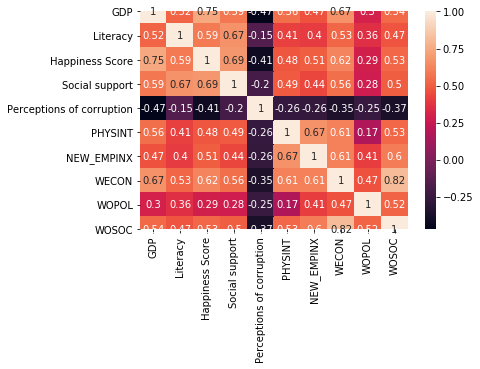

In [21]:
data_corr = new_hr_mean[['GDP', 'Literacy', 'Happiness Score', 'Social support', 'Perceptions of corruption', 'PHYSINT', 'NEW_EMPINX', 'WECON', 'WOPOL', 'WOSOC']].corr()
sns.heatmap(data_corr, annot=True)

The heatmap above shows correlations between GDP, Literacy, Happiness Score, Social Support, Perceptions of Corruption, Physical Integrity Rights Index (PHYSINT), Empowerment Rights Index (NEW_EMPINX), Women's Economic Rights (WECON), Women's Political Rights (WOPOL), and Women's Social Rights (WOSOC). GDP, Literacy, Happiness Score, and Social Support all have positive correlations with the 5 rights indicators. In other words, how much a government respects those rights corresponds with how developed a country's economy, education, and well-being are. Perceptions of Corruption is negatively correlated with the 5 rights indicators, which means that the less corrupted the government, the more those rights are respected.

In [22]:
#graphs of correlations between indicators

alt.Chart(new_hr_mean).mark_circle().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    tooltip='Country', color='Region'
).properties(width=150, height=150).repeat(
    row=['GDP', 'Literacy', 'Happiness Score', 'Social support', 'Perceptions of corruption'],
    column=['PHYSINT', 'NEW_EMPINX', 'WECON', 'WOPOL', 'WOSOC']
).interactive()

alt.RepeatChart(...)

The scatter plots above illuminate more on how those variables are correlated. Most of these scatter plots show some linear or non-linear correlations: Perceptions of Corruption correlates negatively with all 5 rights, while the rest of the scatter plots show positive correlations. However, the plots of Literacy vs. PHYSINT and Literacy vs. NEW_EMPINX are very scattered around and show no clear correlations.

## Human rights in Iraq before the 2003 invasion and during the Iraq War

Some countries in this dataset experienced periods of interregnum or interruption due to war. One of those countries is Iraq, and I want to find out the changes in its practices of human rights before the 2003 invasion and during the Iraq War.

In [23]:
hr_iraq = hr[hr['CTRY'] == 'Iraq'] #create a dataset of Iraq
hr_iraq.head()

,CTRY,YEAR,UNCTRY,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
2511,Iraq,1981,368.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2512,Iraq,1982,368.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
2513,Iraq,1983,368.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0
2514,Iraq,1984,368.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
2515,Iraq,1985,368.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0


In [24]:
alt.Chart(hr_iraq).mark_line().encode(
    alt.X(alt.repeat('row'), type='quantitative'),
    alt.Y(alt.repeat('column'), type='quantitative')
).properties(width=150, height=150).repeat(
    row=['YEAR'],
    column=['PHYSINT', 'NEW_EMPINX', 'WECON', 'WOPOL', 'WOSOC']
).interactive()

alt.RepeatChart(...)

The line plots above show how each right indicator in Iraq had changed from 1981 to 2011. All of these 5 rights experienced a decrease in scores in mid-1990s leading up to the 2003 invasion: PHYSINT, NEW_EMPINX, and WOSOC plunged to 0 and remained so, while WOPOL decreased to 1 and WECON fluctuated between 0 and 1. As a result of the invasion, the government of Iraq was interrupted; therefore, no scores were recorded in 2003 and 2004. After the invasion, what stands out the most is that the WOPOL score was up to 3 in 2005, indicating that women’s political rights were guaranteed in both law and practice. However, from 2006, WOPOL was decreased to 2, indicating that women’s political rights were guaranteed in law but were still moderately prohibited in practice. The other rights also have the same trend of improvement following the invasion. WOSOC was retired in 2005 so no data exists from 2005 onward.

## How communist countries practice human rights differently

I chose to look into communist countries due to my wish to learn more about communism and how communist countries practice human rights differently. The findings will help me be more informed about the political landscape of communist states and my country, Vietnam, in particular. ***This analysis simply reflects the dataset I'm working on, neither does it imply my potitical view nor my intent to praise or decry any country.***

In [25]:
#create a new dataset of 4 communist countries: Vietnam, China, Cuba, and Laos
hr_communist = hr[(hr['CTRY'] == 'Vietnam') | (hr['CTRY'] == 'China') | (hr['CTRY'] == 'Cuba') | (hr['CTRY'] == 'Laos')]
hr_communist.head()

,CTRY,YEAR,UNCTRY,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
1116,China,1981,156.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
1117,China,1982,156.0,3.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
1118,China,1983,156.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
1119,China,1984,156.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
1120,China,1985,156.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


In [26]:
alt.Chart(hr_communist).mark_line().encode(
    alt.X(alt.repeat('row'), type='quantitative'),
    alt.Y(alt.repeat('column'), type='quantitative'),
    color='CTRY'
).properties(width=150, height=150).repeat(
    row=['YEAR'],
    column=['PHYSINT', 'NEW_EMPINX', 'WECON', 'WOPOL', 'WOSOC']
).interactive()

alt.RepeatChart(...)

For PHYSINT and NEW_EMPINX, Laos generally surpasses the other countries, while the other ones sort of fluctuate within the same score range. China is ranked lowest in its practices of PHYSINT with scores in 2009, 2010, and 2011 as 0. A PHYSINT score of 0 means that there are more than 50 cases of torture, extrajudicial killing, disappearance, and political imprisonment each in a given year. Both China and Cuba experienced a NEW_EMPINX score of 0 from mid-2000s onward. A NEM_EMPINX score of 0 indicates complete government censorship and/or ownership of the media, severe and widespread government restrictions on religious practices, severely restricted domestic and foreign travel, severely restricted or completely denied citizens' rights to freedom of assembly and association, no right to self-determination through political participation, and severely restricted worker's rights.

With regards to women's rights, Cuba surpasses all the other countries since its scores of WECON, WOPOL, and WOSOC reached 3 in many years. Scores of 3 for WECON, WOPOL, and WOSOC indicate that all or nearly all of women’s economic rights, women’s political rights, and women’s social rights were guaranteed by law and the government fully and vigorously enforces these laws in practice. In general, all 4 countries show somewhat to moderate respect for WECON, WOPOL, and WOSOC. One interesting finding is that Vietnam's WOSOC plunged from 2 in 2003 to 0 in 2004, while its scores of WECON and WOPOL in 2004 were 2 and 3 respectively. A WOSOC score of 0 indicates that there are no social rights for women under law and systematic discrimination based on sex may be built into the law. Given Vietnam's record of WOSOC scores ranging between 1 and 2 in the previous years, this finding prompts me to look more into what happened in Vietnam in 2004 that led to such a decrease in WOSOC score.

## Predict Happiness Score from Empowerment Rights Index using Polynomial Regression

I will create a Polynomial Regression model that predicts the Happiness Score from NEW_EMPINX scores. The NEW_EMPINX scores I'm using are the average scores of each country from 1981 to 2011. And the Happiness Scores were measured in 2012.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [28]:
new_hr_mean = new_hr_mean.dropna() #drop all the NaN rows
new_hr_mean.shape #there are 115 rows left after dropping NaN rows, compared to 202 rows intially

(115, 26)

In [29]:
#split the dataset in two part: the label y and the set of features X
X = new_hr_mean[['NEW_EMPINX']].values #readers can choose X of their choice by changing the feature name
y = new_hr_mean['Happiness Score'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
#fit Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) #readers can change the degree to explore different levels of fitting
X_train_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train) #train model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
X_test_poly = poly_reg.fit_transform(X_test)
y_test_predict = lin_reg.predict(X_test_poly)

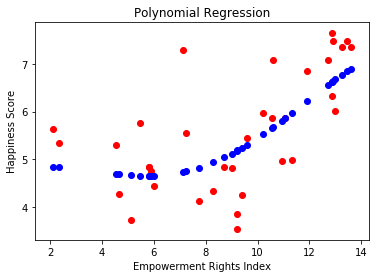

In [33]:
#visualize the Polynomial Regression results
plt.scatter(X_test, y_test, color = 'red') #red dots indicate real values of y_test vs. X_test
plt.scatter(X_test, y_test_predict, color = 'blue') #blue dots indicate predicted values of y from X_test
plt.title('Polynomial Regression')
plt.xlabel('Empowerment Rights Index')
plt.ylabel('Happiness Score')
plt.show()

In [34]:
MAE = np.mean(np.abs(y_test_predict - y_test))
print('Mean Absolute Error:', MAE)

Mean Absolute Error: 0.6813569725457977


The mean absolute error of this model is very high, which means that my model is unreliable. I chose a degree of the Polynomial Regression of 4 because after tinkering with various numbers, I found 4 to give an acceptable fitting of the model. Degrees lower than 4 would cause underfitting and degrees higher would cause overfitting. The dataset I used for this model consists of only 115 entries and is pretty scattered around. The small sample size doesn't train the model well enough to give precise predictions. Readers can also alter the test size of the `train_test_split` function to explore different levels of accuracy of this model. I chose a test size of 0.3 because I found it to be the most ideal.

## Ethical Consideration

I chose to work on this dataset because I'm interested to learn how humans all over the world are treated differently depending on their government. This dataset will give us a bigger picture of how the government's practices of human rights in each country have evolved from 1981 to 2011 and what still needs to be improved. I believe this dataset will help us be more informed in this matter and know better what to do to help make the world a fairer place. Even though the [Coding Manual](https://drive.google.com/file/d/0BxDpF6GQ-6fbWkpxTDZCQ01jYnc/view?usp=sharing) provides a very clear and thorough guide of how the rights are evaluated, I still have doubts that the ratings in this dataset might be biased towards the US allies since most of the data is pulled from the US State Department Country Reports on Human Rights Practice. In certain countries, information regarding the practices of certain rights was limited. Therefore, some ratings may not reflect the whole situation of those countries.